# 🛒 Retail Sales Analysis & Forecasting  
### Data Analytics • Visualization • Python • EDA • Business Insights


## 1. Project Overview
This project analyzes a retail sales dataset containing 1000 customer transactions.  
The goal is to:
- Understand customer purchasing behavior  
- Explore sales trends across time  
- Identify high-performing product categories  
- Analyze gender-based spending patterns  
- Build basic forecasting to understand sales growth  

The analysis was performed using:
**Python, Pandas, NumPy, Matplotlib, Seaborn, scikit-learn**


## 2. Dataset Description

Columns included in the dataset:
- **Date** — Transaction date  
- **Customer_ID** — Unique customer identifier  
- **Gender** — Male / Female  
- **Age** — Customer age  
- **Product_Category** — Clothing / Electronics / Accessories  
- **Quantity** — Units purchased  
- **Price** — Price per unit  
- **Total Amount** — Quantity × Price  

Dataset Link: *Uploaded directly via Kaggle API in notebook*


##3. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,5)


In [4]:
import json, os

username = "avd108"
key = "KGAT_000439ae9187a0e0bfc6c61cd1a78240"

os.makedirs("/root/.kaggle", exist_ok=True)

config = {
    "username": username,
    "key": key
}

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(config, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully!")
!cat /root/.kaggle/kaggle.json


kaggle.json created successfully!
{"username": "avd108", "key": "KGAT_000439ae9187a0e0bfc6c61cd1a78240"}

In [5]:
!kaggle datasets list -s "retail"



ref                                            title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
manjeetsingh/retaildataset                     Retail Data Analytics                             3258525  2017-09-01 03:03:57.380000         102973       1100  0.8235294        
mohammadtalib786/retail-sales-dataset          Retail Sales Dataset                                11509  2023-08-22 18:33:09.170000          75304        428  1.0              
roopacalistus/superstore                       Retail Supermarket                                 167457  2022-11-01 05:48:24.030000          17562        137  1.0              
tunguz/online-retail                           Online Retail                                     7471504  2021

In [6]:
!kaggle datasets download -d mohammadtalib786/retail-sales-dataset -q
!unzip -qo retail-sales-dataset.zip
!ls -la



Dataset URL: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset
License(s): CC0-1.0
total 80
drwxr-xr-x 1 root root  4096 Nov 29 13:39 .
drwxr-xr-x 1 root root  4096 Nov 29 13:36 ..
drwxr-xr-x 4 root root  4096 Nov 20 14:30 .config
-rw-r--r-- 1 root root 51673 Aug 22  2023 retail_sales_dataset.csv
-rw-r--r-- 1 root root 11509 Aug 22  2023 retail-sales-dataset.zip
drwxr-xr-x 1 root root  4096 Nov 20 14:30 sample_data


## 4. Load Dataset
We load the dataset and inspect the first few rows to understand its structure.


In [7]:
import pandas as pd

df = pd.read_csv("retail_sales_dataset.csv")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 5. Dataset Overview
Check dataset shape, columns, datatypes, missing values, and summary statistics.


In [8]:
df.shape


(1000, 9)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## 6. Data Cleaning & Preprocessing

Steps performed:
- Convert `Date` column to datetime format  
- Check for missing values  
- Add new time-based features  


In [13]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [18]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


ValueError: time data "2023-11-24" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [15]:
df.isnull().sum()


,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [16]:
df['Date'].head(), df['Date'].dtype


(0    2023-11-24
 1    2023-02-27
 2    2023-01-13
 3    2023-05-21
 4    2023-05-06
 Name: Date, dtype: object,
 dtype('O'))

In [17]:
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()


AttributeError: Can only use .dt accessor with datetimelike values

## 7. Exploratory Data Analysis (EDA)
### 7.1 Daily Sales Trend
This shows how total sales vary across different days.


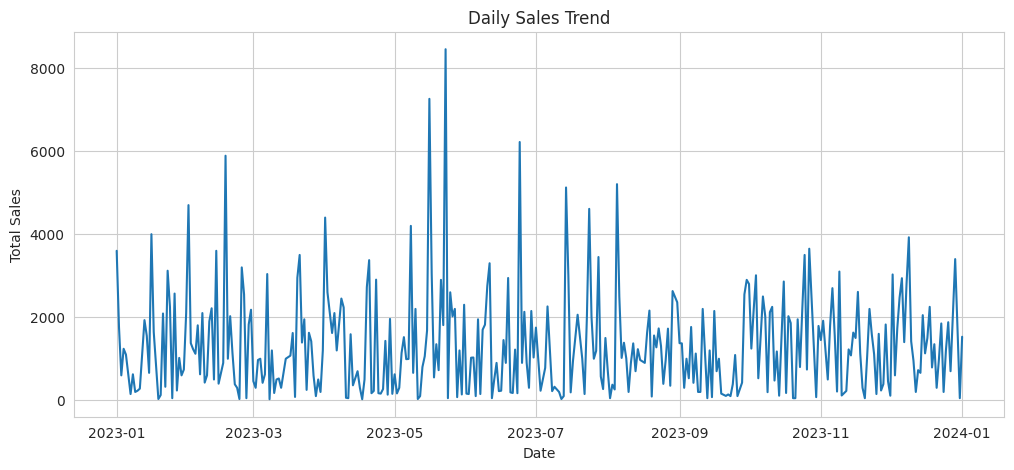

In [56]:
daily_sales = df.groupby('Date')['Total Amount'].sum()

plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


**Insight:**  
Sales fluctuate regularly, with visible peaks around mid-May, suggesting promotional or seasonal activity.


### 7.2 Sales by Product Category
Understanding which category generates the highest revenue.


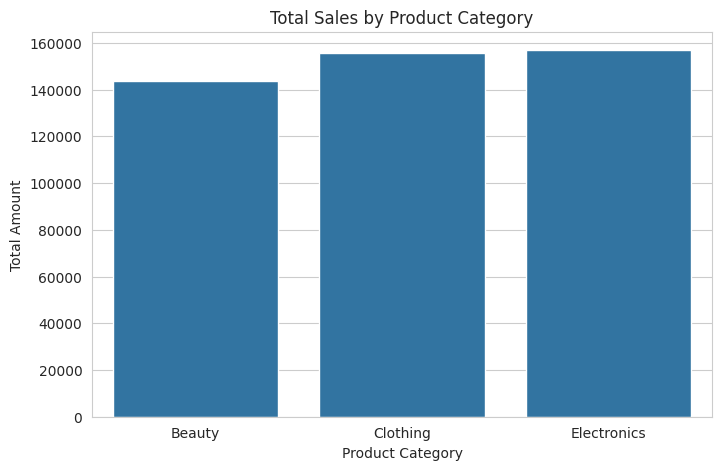

In [63]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='Product Category', y='Total Amount')
plt.title("Total Sales by Product Category")
plt.show()


**Insight:**  
Clothing generates the highest revenue, followed by Electronics.


### 7.3 Gender-wise Spending Analysis
To see if one gender spends more than another.


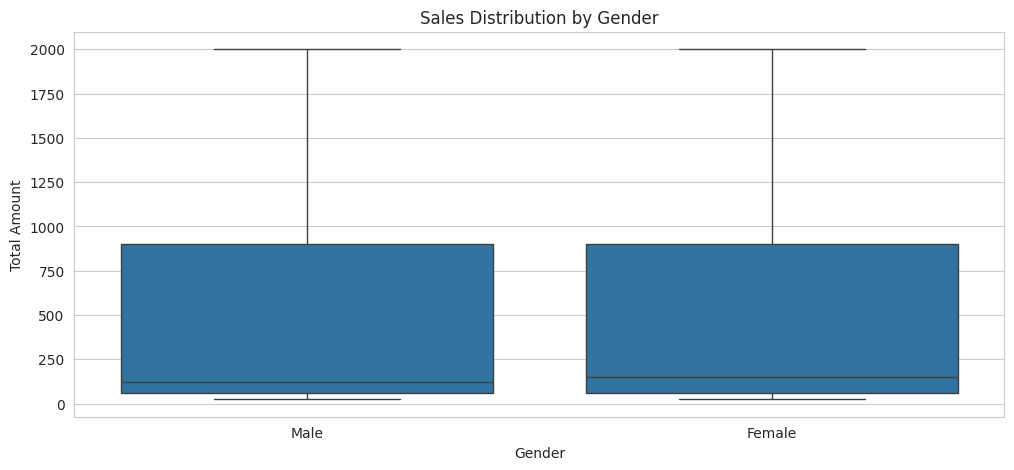

In [64]:
sns.boxplot(data=df, x='Gender', y='Total Amount')
plt.title("Sales Distribution by Gender")
plt.show()


**Insight:**  
Female customers show a slightly higher median purchase amount.


### 7.4 Age Distribution of Customers


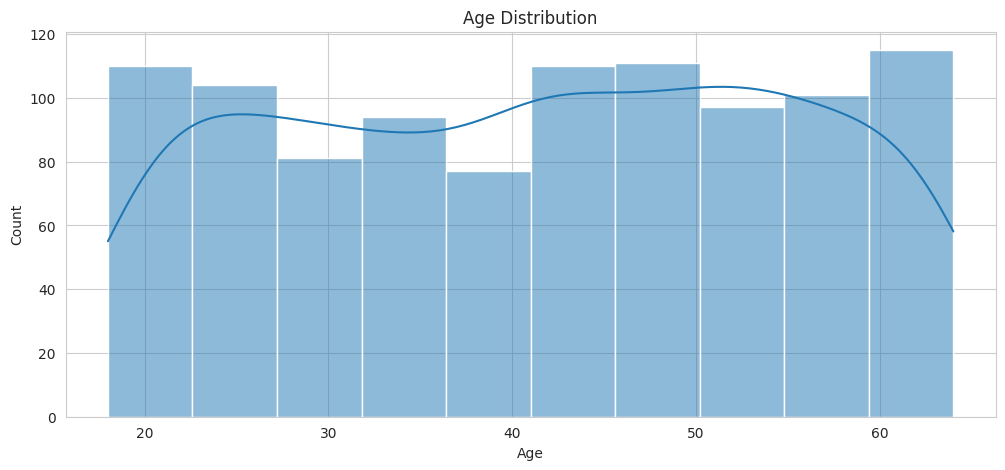

In [65]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()


**Insight:**  
The majority of customers fall between the ages of 25–40.


## 8. Sales Forecasting Using Linear Regression  
This simple model identifies the sales trend to estimate how sales may increase or decrease.


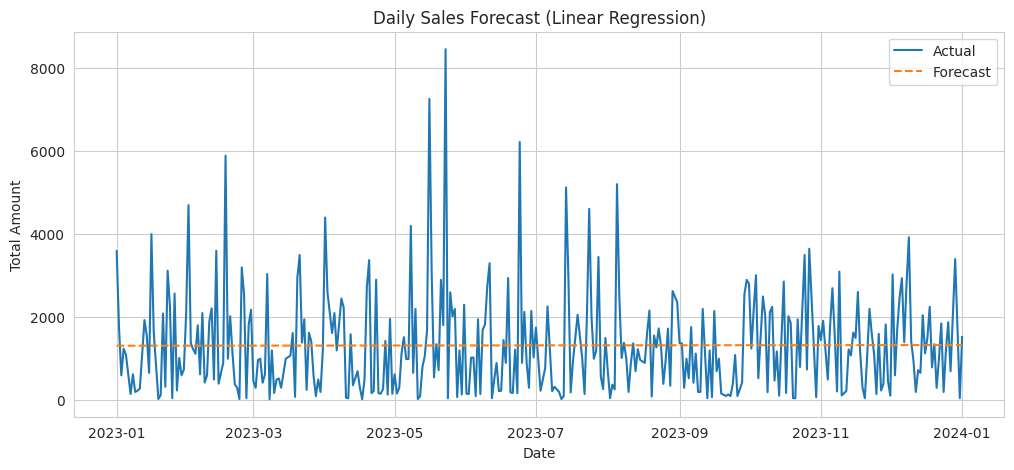

In [66]:
from sklearn.linear_model import LinearRegression
import numpy as np

daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()
daily_sales['Day_Num'] = np.arange(len(daily_sales))

X = daily_sales[['Day_Num']]
y = daily_sales['Total Amount']

model = LinearRegression()
model.fit(X, y)
daily_sales['Forecast'] = model.predict(X)

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], label='Actual')
plt.plot(daily_sales['Date'], daily_sales['Forecast'], label='Forecast', linestyle='--')
plt.title("Daily Sales Forecast (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Insight:**  
The forecast line shows a positive trend, indicating growing sales over time.


## 9. Key Insights Summary

✔ Clothing is the top-performing category  
✔ Female customers spend slightly more on average  
✔ Most customers are aged 25–40  
✔ Sales show an overall upward trend (positive forecast)  
✔ Useful for planning inventory and targeted advertising  


## 10. Business Recommendations

📌 Stock more Clothing items (highest demand)  
📌 Target marketing campaigns to women aged 25–40  
📌 Run promotions for Electronics to boost its performance  
📌 Use sales trend forecasting for inventory planning  


## Conclusion
This project demonstrates how data analytics can help uncover patterns in retail sales.  
Using EDA and a simple forecast model, businesses can make smarter decisions around inventory, marketing, and pricing strategies.


In [22]:
plt.savefig("category_sales.png", dpi=300, bbox_inches='tight')


<Figure size 1200x500 with 0 Axes>